In [1]:
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [2]:
import sys, os
sys.path.insert(0,os.pardir)
from tests.generate_test_data import generate_fakeTAC_SRTM

In [3]:
import numpy as np
np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

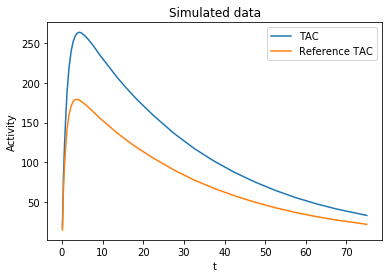

In [4]:
# generate noiseless fake data based on SRTM
BP = 0.5
R1 = 1.2
t, dt, TAC, refTAC = generate_fakeTAC_SRTM(BP, R1)

fig, ax = plt.subplots();
ax.plot(t, TAC, label='TAC');
ax.plot(t, refTAC, label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

In [5]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC)

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424241]),
 'R1': array([ 1.37144153]),
 'akaike': array([ 200.49477373]),
 'err': array([ 0.7036541]),
 'fpe': array([ 725.00102048]),
 'k2': array([ 0.48673687]),
 'logl': array([-96.24738686]),
 'mse': array([ 19.07897422])}

In [6]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC)

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519]),
 'R1': array([ 1.21159295]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 1.16059185]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.7736839]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 0.01630222]),
 'noiseVar_eqR1': array([ 0.0097611])}

In [7]:
# Generate noisy simulations by adding normal noise -- I don't think this is a good way
pct_noise = np.array([0, 5, 10, 15, 20, 25, 30])

TAC_matrix = TAC + np.random.normal(0,np.outer(TAC,pct_noise/100).T)

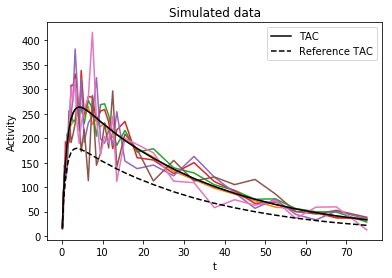

In [8]:
fig, ax = plt.subplots();
ax.plot(t, TAC_matrix.T, label='');
ax.plot(t, TAC, 'k-', label='TAC');
ax.plot(t, refTAC, 'k--', label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

Experiment using noisy TAC and noiseless reference TAC

In [9]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC_matrix, refTAC)

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424241,  0.47519372,  0.55660364,  0.595188  ,  0.50364839,
         0.55481882,  0.52047176]),
 'R1': array([ 1.37144153,  1.34119588,  1.28829097,  1.59837418,  1.43297264,
         1.16301822,  1.61345949]),
 'akaike': array([ 200.49477373,  253.63358593,  294.91916901,  331.30009014,
         356.85903575,  353.66003613,  365.56831711]),
 'err': array([ 0.7036541 ,  1.53747016,  2.8215341 ,  4.81765043,  7.015761  ,
         6.69333802,  7.97320189]),
 'fpe': array([   725.00102048,   3461.25475681,  11657.10697844,  33985.27160877,
         72072.52669682,  65600.27972795,  93086.28497049]),
 'k2': array([ 0.48673687,  0.39345385,  0.36525971,  7.99999988,  0.03232804,
         0.07022063,  1.75928283]),
 'logl': array([ -96.24738686, -122.81679297, -143.4595845 , -161.65004507,
        -174.42951787, -172.83001806, -178.78415856]),
 'mse': array([   19.07897422,    91.0856515 ,   306.76597312,   894.34925286,
         1896.64543939,  1726.32315074,  2449.639078

In [10]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC_matrix, refTAC)

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519,  0.47445036,  0.55790968,  0.5702964 ,  0.48089571,
         0.47599935,  0.41665198]),
 'R1': array([ 1.21159295,  1.45038812,  1.28828813,  1.58901868,  1.43550319,
         1.17206718,  1.53922308]),
 'R1_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2': array([ 1.16059185,  0.06528311,  0.36902009,  0.00744475,  0.02431207,
         0.06465781,  0.05092178]),
 'k2_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2a': array([ 0.7736839 ,  0.04413523,  0.23651312,  0.0049335 ,  0.01597015,
         0.04139514,  0.03712914]),
 'k2a_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'noiseVar_eqDVR': array([  1.63022203e-02,   7.55049158e+02,   1.66238244e+03,
          4.35170594e+03,   2.00840102e+04,   9.03967357e+04,
          2.00982355e+04]),
 'noiseVar_eqR1': array([  9.76110199e-03,   1.06128843e+02,   3.47547112e+02,
          8.09312762e+02,   1.91661875e+03,   2.03653778e+03,
          2.34806498e+03])}

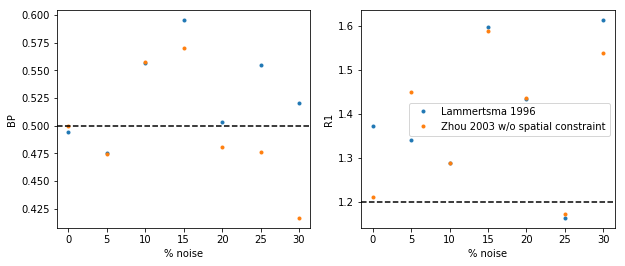

In [11]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

axes[0].plot(pct_noise, mdl_lammertsma.results['BP'], '.', label='Lammertsma 1996');
axes[0].plot(pct_noise, mdl_zhou.results['BP'], '.', label='Zhou 2003 w/o spatial constraint');
axes[0].axhline(y=BP, color='k', linestyle='--');
axes[0].set_xlabel('% noise');
axes[0].set_ylabel('BP');
#axes[0].legend();

axes[1].plot(pct_noise, mdl_lammertsma.results['R1'], '.', label='Lammertsma 1996');
axes[1].plot(pct_noise, mdl_zhou.results['R1'], '.', label='Zhou 2003 w/o spatial constraint');
axes[1].axhline(y=R1, color='k', linestyle='--');
axes[1].set_xlabel('% noise');
axes[1].set_ylabel('R1');
axes[1].legend();